<a href="https://colab.research.google.com/github/shobhit020/Car-Evalution-Dataset/blob/main/Car_Evaluation_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Original dataset is from https://archive.ics.uci.edu/ml/datasets/Car+Evaluation*** 


***But Csv file is downloaded from https://www.kaggle.com/elikplim/car-evaluation-data-set?select=car_evaluation.csv***

### Objective : Classify the condition of the car

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/car_evaluation.csv',header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
df.columns = col_names

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
df.shape

(1728, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


***We can see there is no NULL values in our dataset***

In [9]:
data = df.copy()

In [10]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## EDA

In [11]:
data.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

*As we can observe there are only few different categories in each feature*

**Now let's observe each feature seperately**

In [12]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64


vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64


2        432
3        432
4        432
5more    432
Name: doors, dtype: int64


2       576
4       576
more    576
Name: persons, dtype: int64


small    576
med      576
big      576
Name: lug_boot, dtype: int64


low     576
med     576
high    576
Name: safety, dtype: int64


unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64




## VISUALIZATION

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
sns.set_style(style='whitegrid')

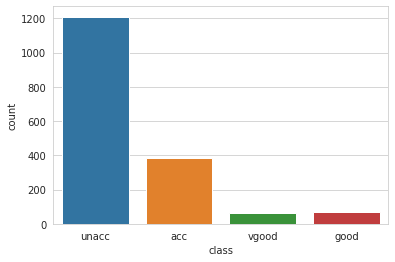

In [15]:
sns.countplot(data['class']);

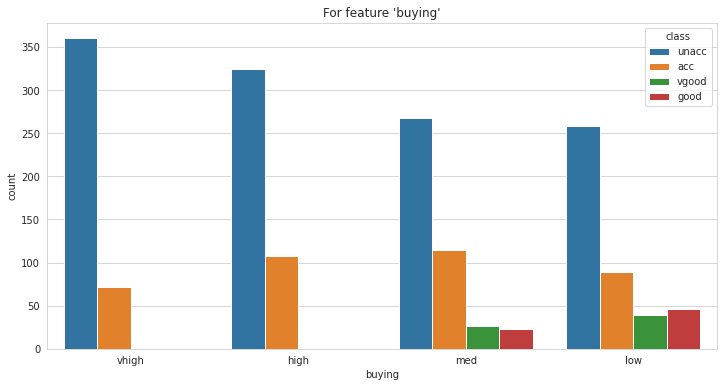

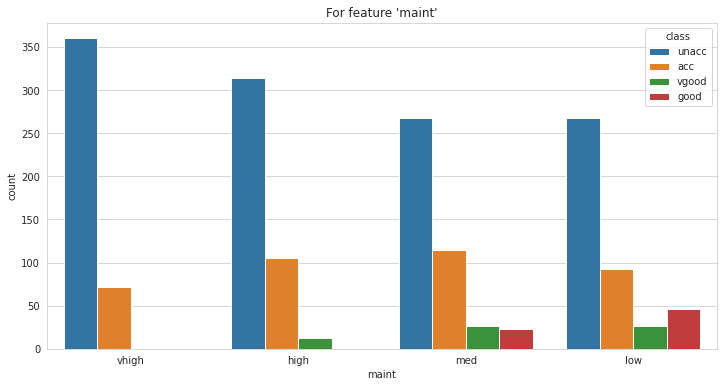

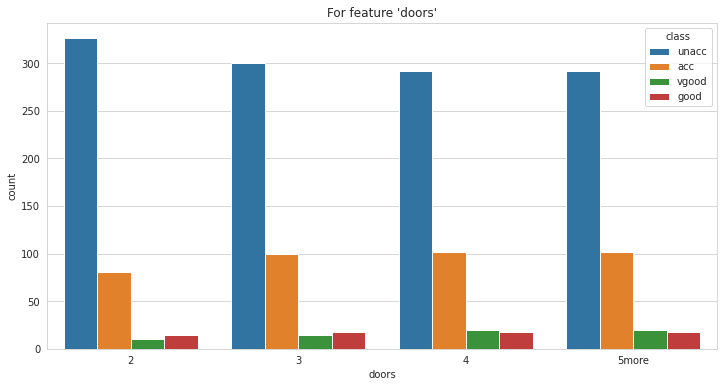

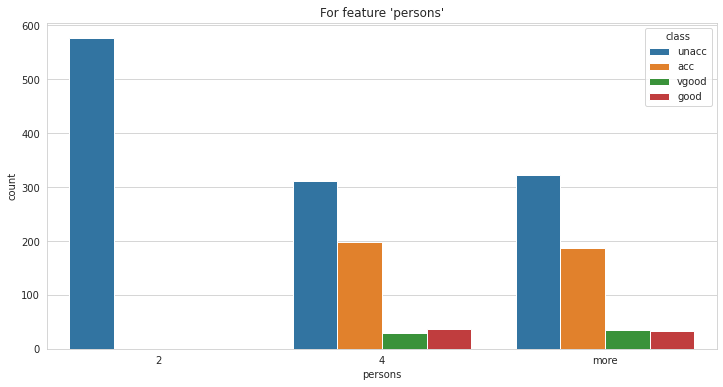

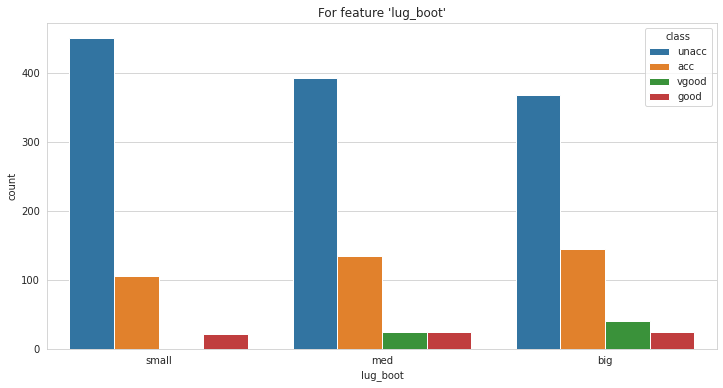

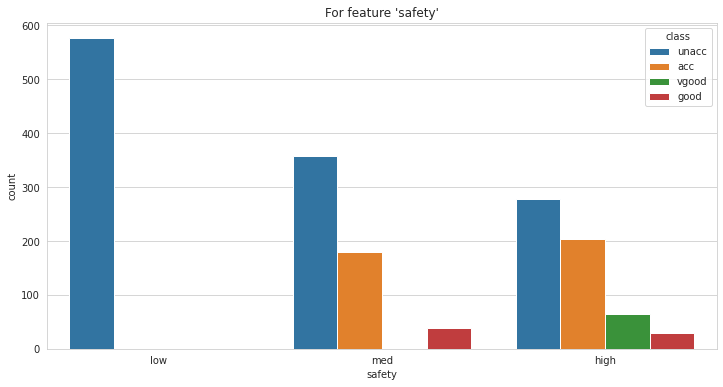

In [16]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['class']);

## Dummifying categories into integer values

In [21]:
!pip install --upgrade category_encoders

     |████████████████████████████████| 86 kB 2.1 MB/s 


In [22]:
import category_encoders as ce

In [23]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [24]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','class'])

In [40]:
data = encoder.fit_transform(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


## Train Test Split

In [41]:
X = data.drop('class',axis=1)
y = data['class']

In [42]:
from sklearn.model_selection import train_test_split,cross_val_score

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("Y_train: {}".format(y_train.shape))
print("Y_test: {}".format(y_test.shape))

X_train: (1209, 6)
X_test: (519, 6)
Y_train: (1209,)
Y_test: (519,)


In [45]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1178,3,3,4,2,3,3
585,2,2,2,3,1,1
1552,4,3,2,2,2,2
1169,3,3,4,1,3,3
1033,3,2,3,1,3,2
...,...,...,...,...,...,...
1130,3,3,2,3,2,3
1294,3,4,4,3,3,2
860,2,4,4,3,2,3
1459,4,2,3,1,1,2


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## LOGISTIC REGRESSION

In [47]:
lr = LogisticRegression(max_iter = 1000,random_state = 48)

In [48]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=48)

In [49]:
y_pred = lr.predict(X_test)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.87      0.93      0.90       358
           2       0.66      0.58      0.62       118
           3       0.75      0.75      0.75        24
           4       0.55      0.32      0.40        19

    accuracy                           0.82       519
   macro avg       0.71      0.64      0.67       519
weighted avg       0.81      0.82      0.81       519



In [53]:
print(accuracy_score(y_test,y_pred))

0.8188824662813102


## KNN CLASSIFIER

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X = scaler.fit_transform(X)

In [ ]:
avg_score=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

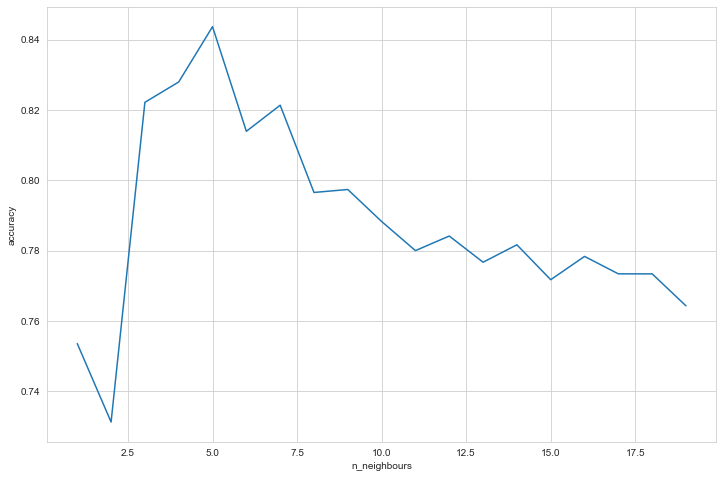

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,20),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")

***So, n_neighbours=5 is giving better accuracy as well as f1-score for our data.***

***So, with KNN Classification algorithm, we are able to achieve accuracy around 90%***

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       118
           1       0.33      0.11      0.16        19
           2       0.88      0.98      0.93       358
           3       0.62      0.21      0.31        24

    accuracy                           0.83       519
   macro avg       0.63      0.48      0.52       519
weighted avg       0.81      0.83      0.81       519



## DECISION TREE CLASSIFIER

In [ ]:
dtree = DecisionTreeClassifier(random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dtree.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9653179190751445

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       118
           1       0.71      0.89      0.79        19
           2       1.00      0.99      0.99       358
           3       0.90      0.79      0.84        24

    accuracy                           0.97       519
   macro avg       0.89      0.90      0.89       519
weighted avg       0.97      0.97      0.97       519



***From Decision Tree Classifier we get the accuracy of 96.5% which is better than KNN classifier.***

# Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, oob_score=True)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))